<a href="https://colab.research.google.com/github/mohamedalifaragitiai/Computer-Vision-Image_Processing/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# log into drive from colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
%cd /content/drive/MyDrive/AMIT/CVCourse/images 


/content/drive/MyDrive/AMIT/CVCourse/images


In [17]:
from __future__ import print_function
import cv2, matplotlib.pyplot as plt
import numpy as np
from google.colab import files
%matplotlib inline

**Masking Imges**

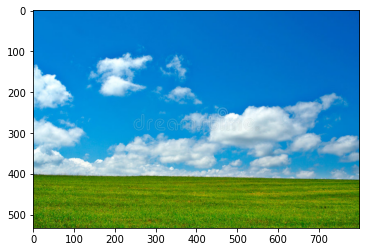

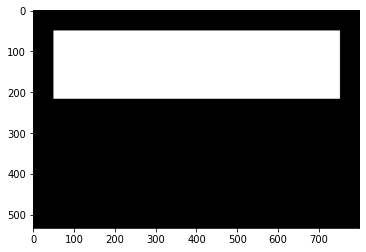

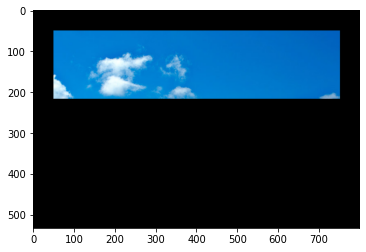

In [116]:
natureImage = cv2.imread('nature.jpg')
plt.imshow(natureImage[:,:,::-1])
plt.show()

maskImage = cv2.rectangle(np.zeros(natureImage.shape[:2], dtype = 'uint8'),
                          (50,50),
                          (natureImage.shape[1]-50, int(natureImage.shape[0] / 2) - 50),
                          (255,255,255), -1)
plt.imshow(maskImage)
plt.show()

masked = cv2.bitwise_and(natureImage, natureImage, mask = maskImage)
plt.imshow(masked[:,:,::-1])

**Splitting and Merging Images**

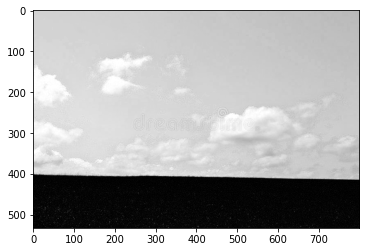

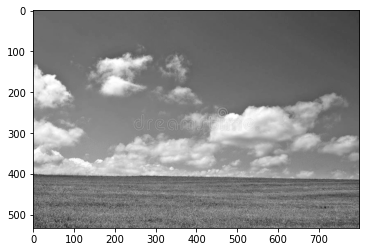

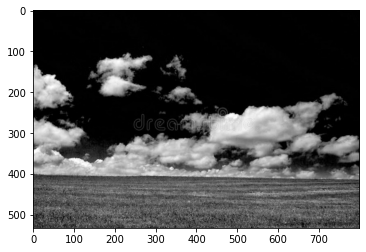

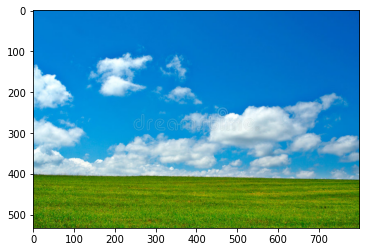

In [117]:
b, g, r = cv2.split(natureImage)

plt.imshow(b, 'gray')
plt.show()
plt.imshow(g, 'gray')
plt.show()
plt.imshow(r, 'gray')
plt.show()

merged = cv2.merge([b,g,r])
plt.imshow(merged[:,:,::-1])
plt.show()

**Normalized and cumulative histogram**

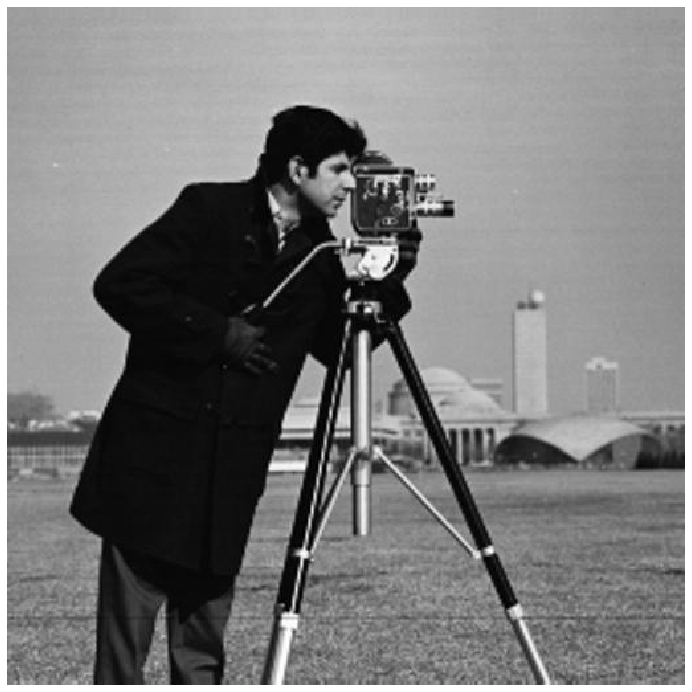

In [38]:

im = imread('camera.jpg')

plt.figure(figsize = (10,10))
imshow(im)
plt.axis('off')
plt.show()

**Normalized Histogram**

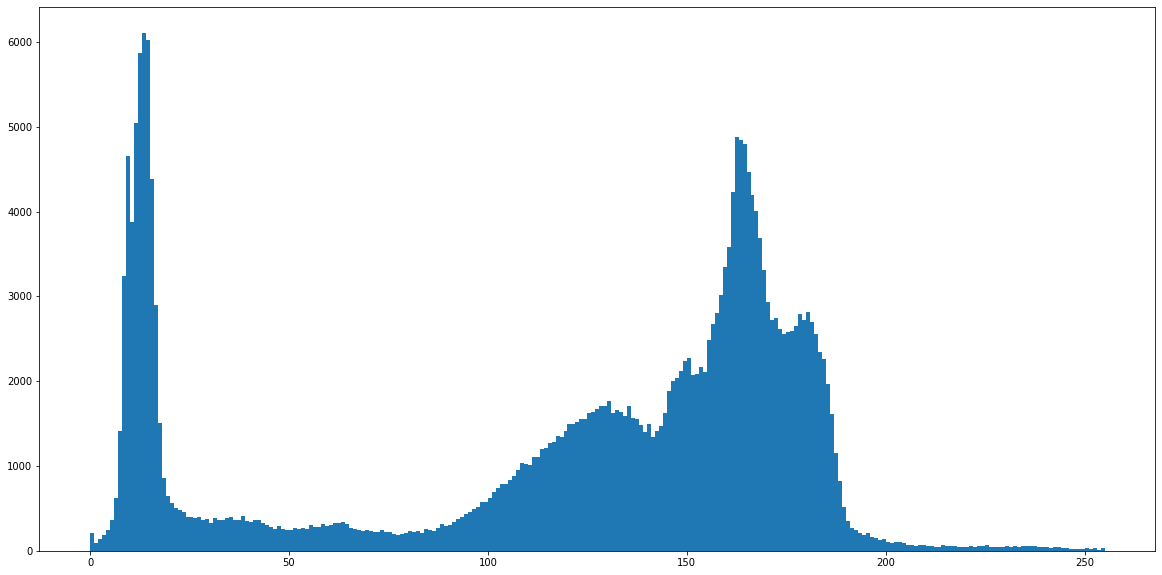

In [32]:
plt.figure(figsize = (20, 10))

y, x, _ = plt.hist(im.flatten(), bins = range(256))

**Cumulative Normalized Histogram**

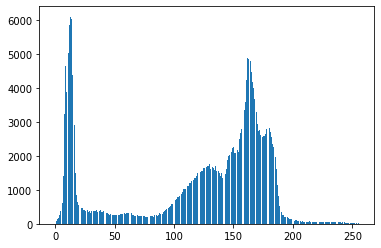

In [33]:
h = [(im==v).sum() for v in range(256)]

plt.figure()
plt.bar(range(256), h)
plt.show()

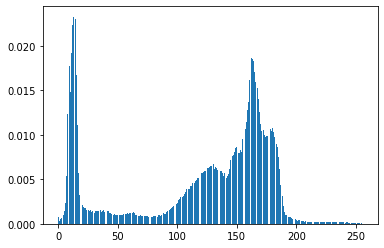

In [35]:
h = np.array(h)
norm_h = h/h.sum()

plt.figure()
plt.bar(range(256), norm_h)
plt.show()

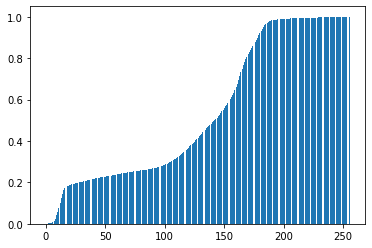

In [36]:
cumul_h = np.zeros((256,))
for i in range(256):
    cumul_h[i] = norm_h[i]+cumul_h[i-1]

plt.figure()
plt.bar(range(256), cumul_h)
plt.show()

**Gray-Level Coocurrence Matrix (GLCM)**

grayscale co-occurence matrix: histogram doesn't take into account the spatial representation of how pixel intensities are related to one another


this can be used to represent certain textures within the image which can be used in image segmentation


the basic idea is to look at pairs of pixel intentisities within the image for a pair of pixels separated by a specific relative displacement and determine their count

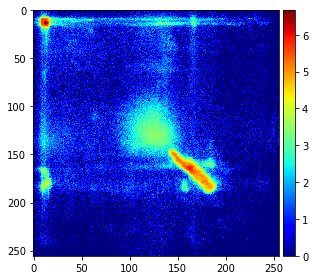

In [57]:
im = imread('camera.jpg')

dx = 20
dy = 20

C = np.ones((256, 256))

for y in range(im.shape[0] - dy):
    for x in range(im.shape[1] - dx):
        i = im[y, x]
        j = im[y + dy, x + dx]
        C[i, j] += 1

C[C == 0] = 0.5

plt.figure()
imshow(np.log(C), cmap = plt.cm.jet)
plt.show()

some patterns emerge here as a characteristic of the image so if we have a peak with intensities that are high and low this could account for edgs in the image, so this can be used to represent patterns

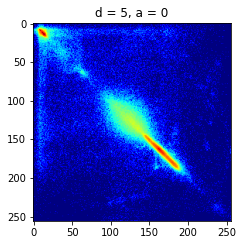

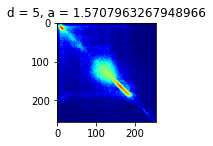

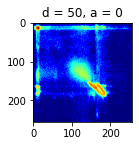

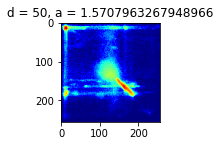

In [66]:
from skimage.feature import greycomatrix, greycoprops

distances = [5, 50]
angles = [0, np.pi/2]
co_matrices = greycomatrix(im, distances, angles).astype('float')

i = 1

plt.figure(figsize = (8, 8))
for idd, d in enumerate(distances):
    for ida, a in enumerate(angles):
        C = co_matrices[:,:,idd,ida]
        C[C == 0] = 0.5
        plt.subplot(2, 2, i)
        plt.imshow(np.log(C), cmap = plt.cm.jet)
        plt.title(f'd = {d}, a = {a}')
        plt.show()
        i += 1

In [67]:
from skimage.feature import greycomatrix, greycoprops

contrast = greycoprops(co_matrices, prop = 'contrast')
dissimilarity = greycoprops(co_matrices, prop = 'dissimilarity')
homogeneity = greycoprops(co_matrices, prop = 'homogeneity')
correlation = greycoprops(co_matrices, prop = 'correlation')
asm = greycoprops(co_matrices, prop = 'ASM')
energy = greycoprops(co_matrices, prop = 'energy')

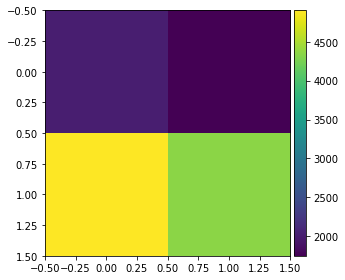

In [68]:
plt.figure()
imshow(contrast)
plt.show()

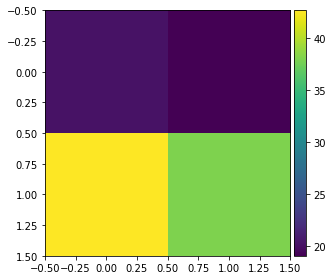

In [72]:
plt.figure()
imshow(dissimilarity)
plt.show()

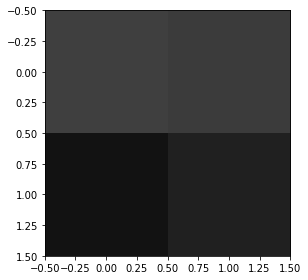

In [73]:
plt.figure()
imshow(homogeneity)
plt.show()

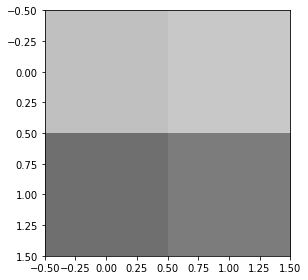

In [74]:
plt.figure()
imshow(correlation)
plt.show()

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


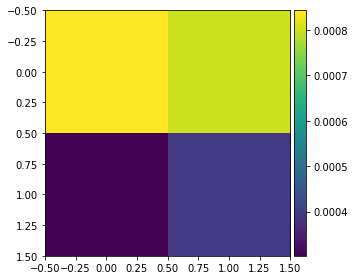

In [75]:
plt.figure()
imshow(asm)
plt.show()

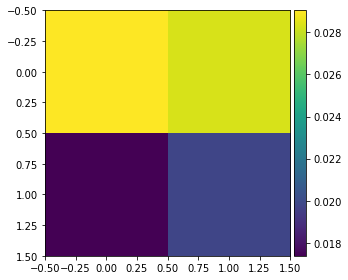

In [76]:
plt.figure()
imshow(energy)
plt.show()

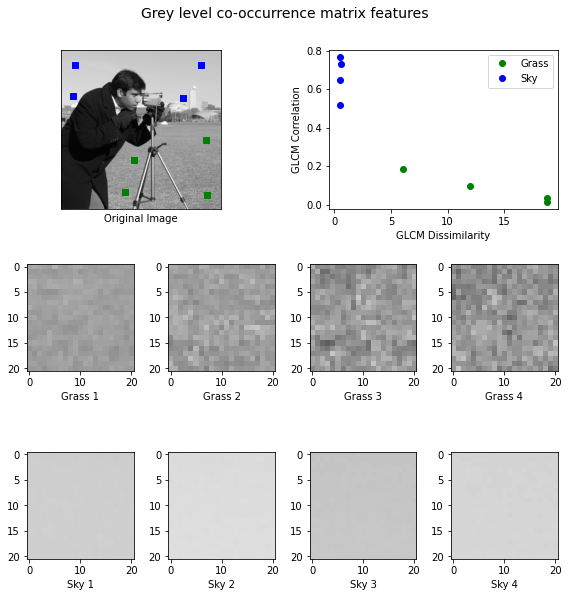

In [79]:
import matplotlib.pyplot as plt


from skimage import data


PATCH_SIZE = 21

# open the camera image
image = data.camera()

# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**these features summarize the glcm diagrams and essence they represent textures, so they can be used with machine learning models**

**Lookup Table (LUT) Filtering**

0 -> 4
1 -> 3
2 -> 2
3 -> 1
4 -> 7
5 -> 6
6 -> 5
7 -> 0


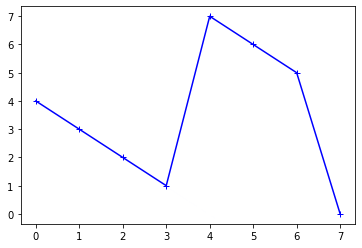

In [18]:
LUT = np.array([4, 3, 2, 1, 7, 6, 5, 0])
for i in range(8):
    print("%d -> %d"%(i,LUT[i]))
    
plt.figure()
plt.plot(range(8), LUT, 'b+-')
plt.show()

(1200, 800)


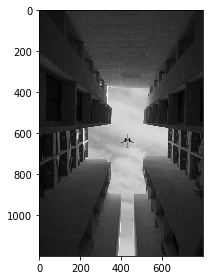

In [20]:
from skimage.io import imread,imshow,imsave

im = imread('airplane.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

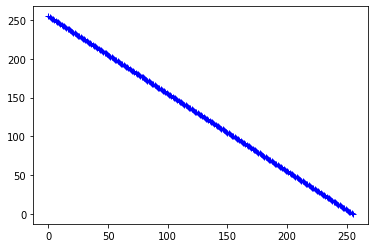

In [21]:
LUT = np.array([255-i for i in range(256)])
plt.figure()
plt.plot(range(256), LUT, 'b+-')
plt.show()

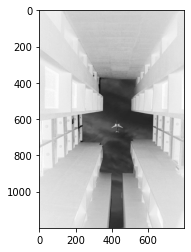

In [22]:
im_out = LUT[im]

plt.figure()
plt.imshow(im_out, cmap=plt.cm.gray)
plt.show()


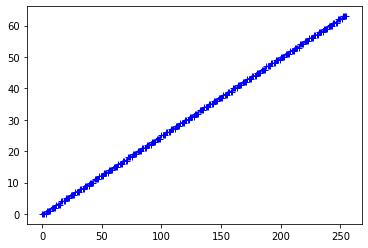

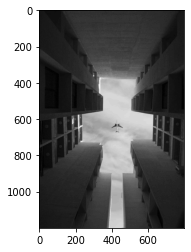

In [23]:
LUT = np.arange(256)//4
plt.figure()
plt.plot(range(256), LUT, 'b+-')
plt.show()

plt.figure()
plt.imshow(LUT[im], cmap=plt.cm.gray)
plt.show()

**LUT Auto-Levels**

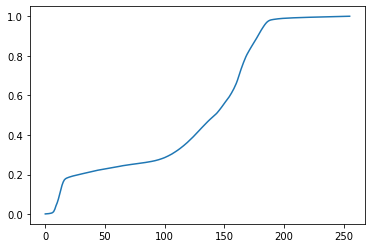

In [39]:
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

h = cumul_hist(im)
plt.figure()
plt.plot(h)
plt.show()

7 189


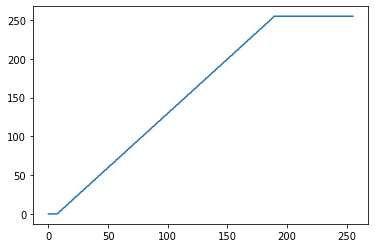

In [40]:
for v in range(256):
    if h[v] > 0.02: break
Tmin = v-1

for v in range(256):
    if h[255-v] < 0.98: break
Tmax = (255-v)+1

print(Tmin,Tmax)

LUT = np.arange(256)
LUT[:Tmin] = 0
LUT[Tmax:] = 255
LUT[Tmin:Tmax] = (255/(Tmax-Tmin))*(LUT[Tmin:Tmax]-Tmin)

plt.figure()
plt.plot(LUT)
plt.show()

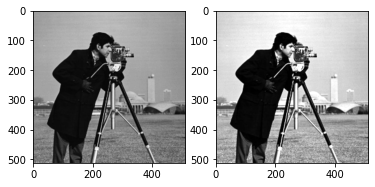

In [41]:
im_out = LUT[im]

plt.figure()
plt.gray()
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im_out)
plt.show()

**LUT Histogram Equalization**

(512, 512)


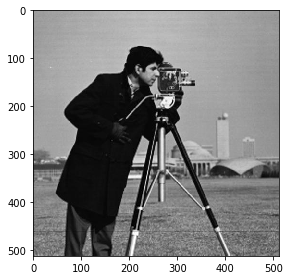

In [42]:
im = imread('camera.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

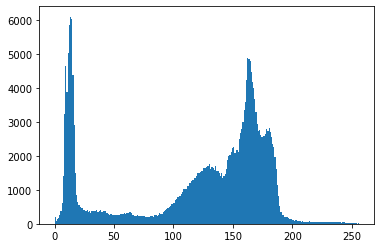

In [43]:
plt.figure()
plt.hist(im.flatten(), bins=np.arange(257))
plt.show()

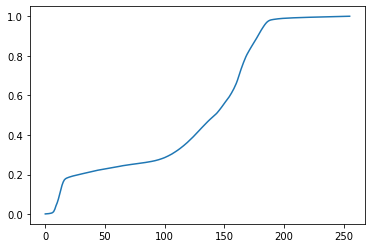

In [44]:
def cumul_hist(im):
    cumul_hist = np.zeros((256,))
    c = 0
    for v in range(256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

h = cumul_hist(im)

plt.figure()
plt.plot(h)
plt.show()

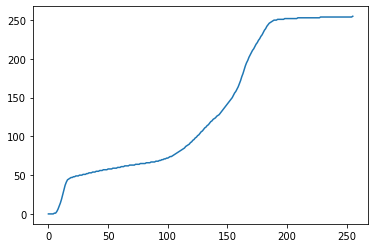

In [45]:
lut = (h*255).astype('uint8')
plt.figure()
plt.plot(lut)
plt.show()

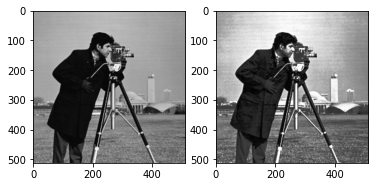

In [46]:
im_out = lut[im]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(im_out, cmap=plt.cm.gray)
plt.show()

**Convolutional Filtering**

(799, 640)


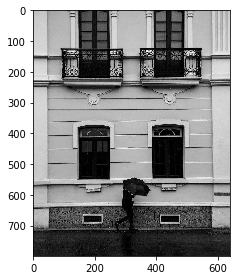

In [47]:
im = imread('walking.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

In [48]:
y = 99
x = 249

old_value = im[y,x]
print(old_value)

ksize = 3
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]).astype('float').T
print(kernel)

# Get region
region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
print(region)

189
[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
[[ 30 189 184]
 [ 28 189 184]
 [ 26 188 184]]


In [49]:
# Output value
output_value = 0
for i in range(ksize):
    for j in range(ksize):
        output_value += region[i,j]*kernel[i,j]
print(output_value)

5.0


In [50]:
# Output for every pixel
im_out = np.zeros((im.shape))
for y in range(ksize//2, im.shape[0]-ksize//2):
    for x in range(ksize//2, im.shape[1]-ksize//2):
        region = im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]
        for i in range(ksize):
            for j in range(ksize):
                im_out[y,x] += region[i,j]*kernel[i,j]

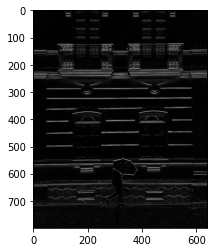

In [51]:
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

In [52]:
# Using numpy indexing
im_out = np.zeros((im.shape))
for y in range(ksize//2, im.shape[0]-ksize//2):
    for x in range(ksize//2, im.shape[1]-ksize//2):
        im_out[y,x] = (im[y-ksize//2:y+ksize//2+1,x-ksize//2:x+ksize//2+1]*kernel).sum()

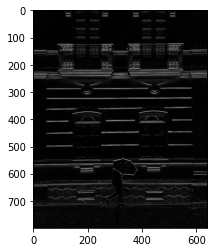

In [53]:
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

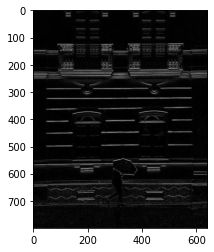

(799, 640) (799, 640)


In [54]:
from scipy.signal import convolve2d

im_out = convolve2d(im, kernel, mode='same')
plt.figure()
plt.imshow(np.abs(im_out), cmap=plt.cm.gray)
plt.show()

print(im.shape, im_out.shape)

**Gaussian Blurring**

(512, 512)


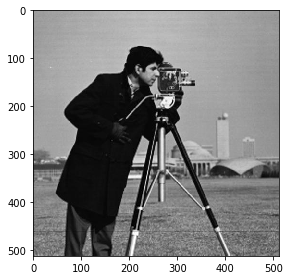

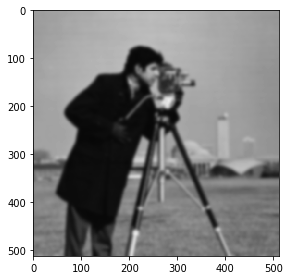

In [89]:
from skimage.filters.rank import median,mean
from skimage.filters import gaussian


im = imread('camera.jpg')
print(im.shape)

plt.figure()
imshow(im)
plt.show()

# apply Gaussian blur, creating a new image
blurred = gaussian(im, sigma = 3 )
#>>> filtered_img = gaussian(image, sigma=1, channel_axis=-1)

plt.figure()
imshow(blurred)
plt.show()


**Morphological Filtering**

**Median Blurring**

(512, 512)


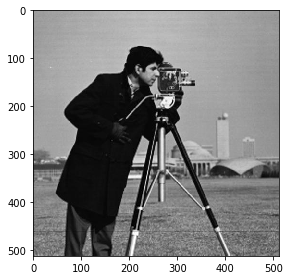

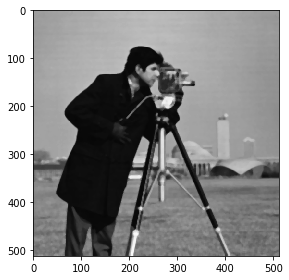

In [92]:
from skimage.filters.rank import minimum, maximum, mean, median


im = imread('camera.jpg')
plt.figure()
imshow(im)
plt.show()

# apply  median blur, creating a new image
blurred = median(im, selem=np.ones((6, 6)) )

plt.figure()
imshow(blurred)
plt.show()


**Morphological Filtering** 


1.   Erosion
2.   Dilation
3.   Closing
4.   Opening



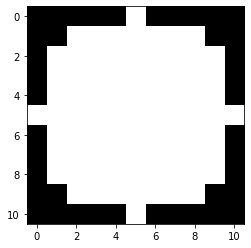

In [96]:
from skimage.morphology import erosion
from skimage.morphology import disk

se = disk(5)
plt.figure()
plt.imshow(se)
plt.show()


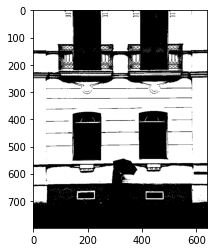

In [97]:
im = imread('walking.jpg')
bw = im>127

plt.figure()
plt.gray()
plt.imshow(bw)
plt.show()

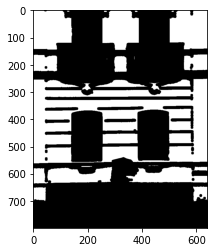

In [104]:
from skimage.morphology import opening,closing,erosion,dilation

plt.figure()
plt.imshow(erosion(bw, se))

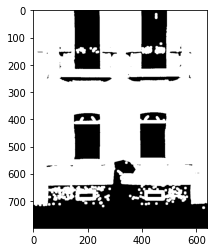

In [105]:
plt.figure()
plt.imshow(dilation(bw, se))
plt.show()

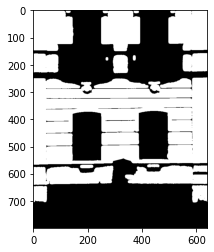

In [106]:
plt.figure()
plt.imshow(opening(bw, se))
plt.show()

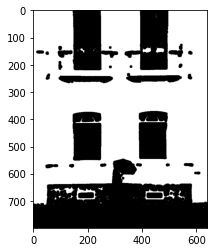

In [107]:
plt.figure()
plt.imshow(closing(bw, se))
plt.show()

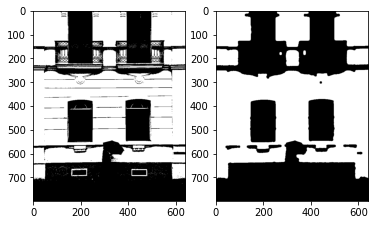

In [99]:
clean = closing(opening(bw,se),se)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(bw)
plt.subplot(1,2,2)
plt.imshow(clean)
plt.show()

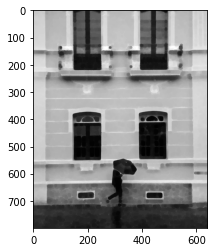

In [100]:
se = disk(5)
plt.figure()
plt.imshow(closing(im,se))
plt.show()

**Skeletonization**

<ipython-input-112-a10dffa353ba>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image = img_as_bool(color.rgb2gray(io.imread('j.png')))


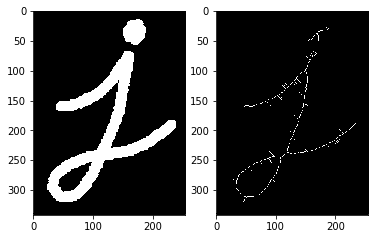

In [112]:
from skimage import img_as_bool, io, color, morphology
import matplotlib.pyplot as plt

image = img_as_bool(color.rgb2gray(io.imread('j.png')))
out = morphology.medial_axis(image)

f, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(image, cmap='gray', interpolation='nearest')
ax1.imshow(out, cmap='gray', interpolation='nearest')
plt.show()

**Sobel filter**

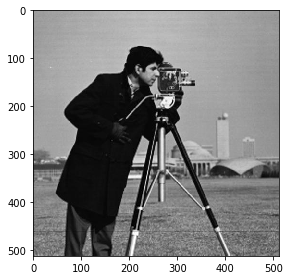

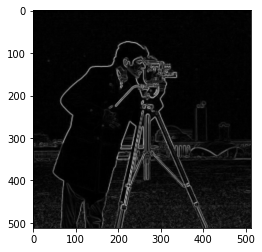

In [113]:
from skimage.filters import sobel

im = imread('camera.jpg')
plt.figure()
imshow(im)
plt.show()


plt.figure()
plt.imshow(sobel(im))
plt.show()

**Canny Edge Detection**

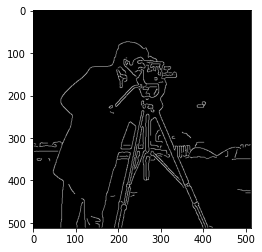

In [114]:
from skimage.feature import canny

borders = canny(im, sigma=2., low_threshold=50, high_threshold=70)

plt.figure()
plt.imshow(borders)
plt.show()

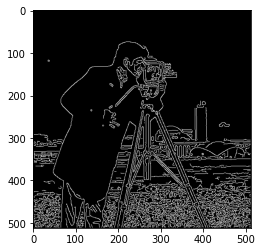

In [115]:
borders = canny(im, sigma=1.0, low_threshold=25, high_threshold=50)

plt.figure()
plt.imshow(borders)
plt.show()